<a href="https://colab.research.google.com/github/Soumo31428/MultipleLinearRegression_CaliforniaHousePrice/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
california = fetch_california_housing()

In [ ]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
print(california.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
## Let's prepare the dataframe
data = pd.DataFrame(california.data, columns=california.feature_names)
data['price'] = california.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
data.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


In [ ]:
data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

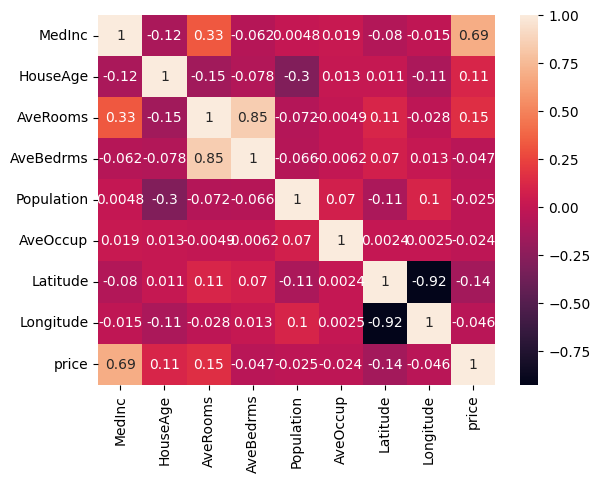

In [ ]:
sns.heatmap(data.corr(), annot = True)

In [ ]:
## Independent and Dependent Features
x = data.iloc[:,:-1]    # Independent features
y = data.iloc[:,-1]     # Dependent feature


In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 10)

In [ ]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((16512, 8), (16512,), (4128, 8), (4128,))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(xtrain)
scaler.transform(xtest)

array([[ 0.74816519, -1.31572939, -0.37191053, ...,  0.14088876,
        -0.69176618,  0.19764496],
       [ 0.05757751, -0.12759233, -0.3128834 , ..., -0.12785833,
         0.893085  , -1.362433  ],
       [ 0.34161679, -1.31572939, -0.38717806, ..., -0.16671457,
        -0.92084497,  0.90042769],
       ...,
       [ 0.06027409,  0.34766249, -0.27538532, ...,  0.02241224,
         1.09411332, -1.37738582],
       [-1.54899983,  1.29817213, -0.27704109, ...,  0.11820192,
        -0.77591757,  0.64622968],
       [ 2.10131731,  0.90212645,  0.44761425, ..., -0.04798297,
        -0.6683908 ,  0.68610388]])

## Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
model.coef_

array([ 4.33102288e-01,  9.32362843e-03, -1.00332994e-01,  6.15219176e-01,
       -2.55110625e-06, -4.78180583e-03, -4.29077359e-01, -4.41484229e-01])

In [ ]:
model.intercept_

-37.48696576537286

In [ ]:
y_pred = model.predict(xtest)

In [ ]:
## Performance Score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
mse = mean_squared_error(ytest, y_pred)
mae = mean_absolute_error(ytest, y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

0.5444842122132867
0.5366527228153425
0.737891734750625


In [ ]:
## R sqaure and adjusted R square
score = r2_score(ytest, y_pred)
adj_r = 1- (1-score)*len(ytest)/(len(ytest)-x.shape[1]-1)
print(score)
print(adj_r)

0.6009790143129111
0.6001071549122838


Text(0.5, 1.0, 'Actual vs Predicted Price')

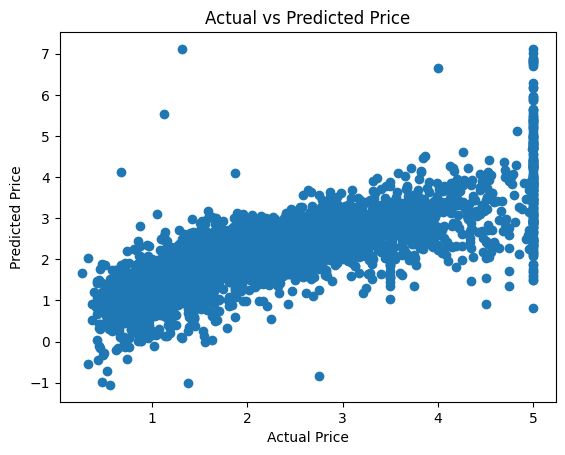

In [ ]:
## Assumptions
plt.scatter(ytest, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')

<ipython-input-34-26ce079b29be>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde = True)


<Axes: xlabel='price', ylabel='Density'>

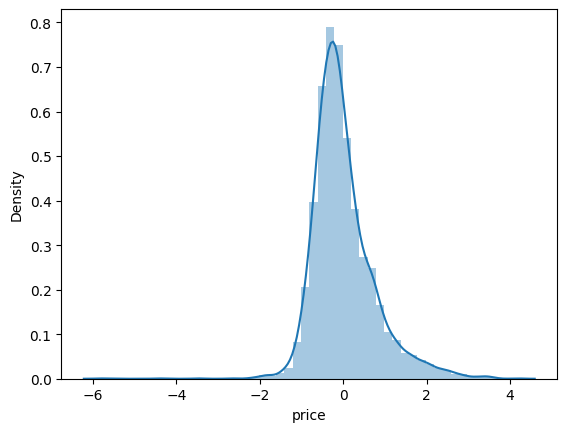

In [ ]:
residuals = ytest-y_pred
sns.distplot(residuals, kde = True)

### In Python, we sometimes need to save the object on the disk for later use. This can be done by using Python pickle. In this article, we will learn about pickles in Python along with a few examples.

Python pickle module is used for serializing and de-serializing a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What Pickle does is it “serializes” the object first before writing it to a file. Pickling is a way to convert a Python object (list, dictionary, etc.) into a character stream.

In [ ]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [ ]:
model = pickle.load(open('model.pkl', 'rb'))

In [ ]:
model.predict(xtest[:50])

array([3.00511808, 2.56692165, 2.33800105, 1.71407997, 1.76334162,
       0.77485129, 2.18514506, 2.24346327, 1.15700777, 3.39072454,
       1.40986153, 1.89794534, 2.42331677, 1.19556538, 1.43354656,
       1.2253837 , 1.69764595, 2.71020233, 2.38266582, 1.0127556 ,
       4.96717278, 1.21630703, 2.20105278, 1.50021653, 3.26859124,
       1.6390435 , 2.56077553, 3.11501694, 1.92774914, 1.0401263 ,
       2.32069082, 1.14549544, 2.28816308, 1.66199404, 1.67517308,
       2.08364478, 3.04045615, 0.36497018, 1.91164035, 1.64973772,
       1.11469658, 4.24985571, 1.95806605, 1.52307641, 1.14600672,
       2.02387854, 2.08358305, 1.33497278, 1.68862913, 2.119442  ])